IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime


The goal of this Quest is to do a one step ahead forecast of the Miles Traveled data.
## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv". Figure out how to set the date to a datetime index columns

In [2]:
import requests
import os
import pandas as pd

def telecharger_et_charger_fichier(url, dossier_destination=None):
    """
    Télécharge un fichier depuis une URL donnée, le sauvegarde dans un dossier spécifié,
    Si le dossier n'existe pas il est crée
    Par defaut enregistre le fichier dans un repertoire ../datas qui est à la racine du projet
    et charge le fichier dans un DataFrame en fonction de son format.

    :param url: URL du fichier à télécharger.
    :param dossier_destination: Dossier de destination optionnel pour le fichier.
    :return: Tuple contenant le DataFrame original, sa copie, et le nom du fichier.
    """
    # Initialiser df_original et df à None
    df_original, df = None, None
    try:
        # Déterminer le nom du fichier à partir de l'URL
        nom_fichier = url.split('/')[-1]

        # Construire le chemin absolu du dossier de destination
        if dossier_destination is None:
            # Chemin par défaut relatif au script
            chemin_script = os.path.dirname(os.path.abspath(__file__))
            chemin_complet = os.path.join(chemin_script, "..", "datas", nom_fichier)
        else:
            # Utiliser le chemin de destination fourni
            chemin_complet = os.path.join(dossier_destination, nom_fichier)

        # Créer le dossier de destination s'il n'existe pas
        os.makedirs(os.path.dirname(chemin_complet), exist_ok=True)

        # Télécharger le fichier
        response = requests.get(url)
        response.raise_for_status()

        # Écrire le contenu dans le fichier de destination
        with open(chemin_complet, 'wb') as file:
            file.write(response.content)

        # Déterminer l'extension du fichier et charger dans un DataFrame
        extension = nom_fichier.split('.')[-1].lower()
        if extension in ['csv', 'txt']:
            df_original = pd.read_csv(chemin_complet, encoding='utf-8')
        elif extension == 'json':
            df_original = pd.read_json(chemin_complet, encoding='utf-8', orient='records')
        elif extension == 'xlsx':
            df_original = pd.read_excel(chemin_complet, index_col=0)
        else:
            print(f"Format de fichier non pris en charge : {extension}")

        # Faire une copie du DataFrame si celui-ci a été chargé
        if df_original is not None:
            df = df_original.copy()

        return df_original, df, chemin_complet

    except requests.HTTPError as http_err:
        print(f"Erreur HTTP lors du téléchargement du fichier : {http_err}")
        return None, None, None
    except Exception as err:
        print(f"Une erreur est survenue lors du téléchargement du fichier : {err}")
        return None, None, None



In [3]:
%%time
# Chargement du df
url="https://raw.githubusercontent.com/crajapax/GDAtrack3b/main/Miles_Traveled.csv"
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
# df_original, df, nom_fichier = telecharger_et_charger_csv(url)
df_original, df, nom_fichier = telecharger_et_charger_fichier( url, "datas/csv")


CPU times: total: 453 ms
Wall time: 1min 24s


In [4]:
# fichier déja enrefistré suer le disque
df_original=pd.read_csv('Miles_Traveled.csv')


In [6]:
df=df_original.copy()


In [7]:
df


,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173
1,1970-02-01,77442
2,1970-03-01,90223
3,1970-04-01,89956
4,1970-05-01,97972
...,...,...
569,2018-08-01,286608
570,2018-09-01,260595
571,2018-10-01,282174
572,2018-11-01,258590


In [8]:
# pd.read_csv(path, encoding='utf-8')
# Convertir l'index en datetime si ce n'est pas déjà le cas
df["DATE"]= pd.to_datetime(df['DATE'])


In [9]:
#  colonne date en index
df.set_index('DATE', inplace=True)


In [10]:
df.describe


<bound method NDFrame.describe of             TRFVOLUSM227NFWA
DATE                        
1970-01-01             80173
1970-02-01             77442
1970-03-01             90223
1970-04-01             89956
1970-05-01             97972
...                      ...
2018-08-01            286608
2018-09-01            260595
2018-10-01            282174
2018-11-01            258590
2018-12-01            268413

[574 rows x 1 columns]>

In [11]:
df.index


DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='DATE', length=574, freq=None)

In [14]:
# data = pd.read_csv(path)
#set the date as the index of our dataframe, ie. each of our datapoints correspond to a date
# df.set_index('DATE',parse_dates=True)
# df=data.copy()
# df.index.reset_index()
# df.index=df.index.freq('MS')

df.index.asfreq='MS'


In [15]:
df


,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173
1970-02-01,77442
1970-03-01,90223
1970-04-01,89956
1970-05-01,97972
...,...
2018-08-01,286608
2018-09-01,260595
2018-10-01,282174


**Task: Change the column names to Value**

In [ ]:
# CODE HERE


**TASK: Plot out the time series**

In [ ]:
# CODE HERE


In [16]:
# Visualisation de la série temporelle
plt.figure(figsize=(10, 6))
plt.plot(df_train['Temp'], label='Températures quotidiennes')
plt.title('Températures Minimales Quotidiennes')
plt.legend()
plt.show()


NameError: name 'df_train' is not defined

<Figure size 1000x600 with 0 Axes>

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

In [ ]:
# CODE HERE


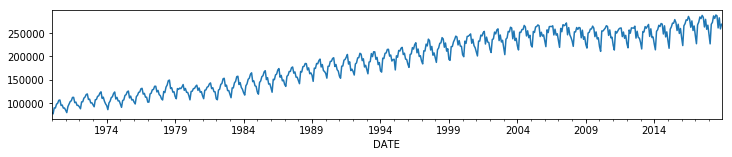

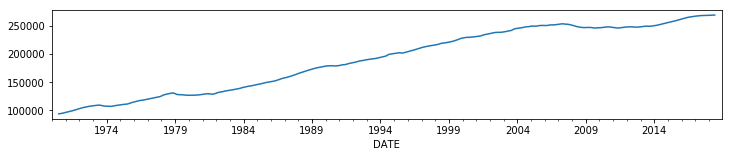

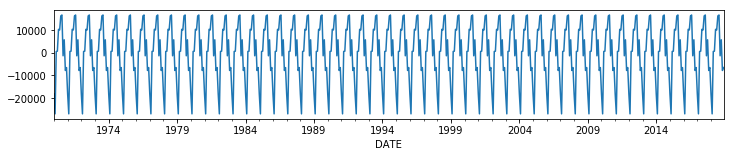

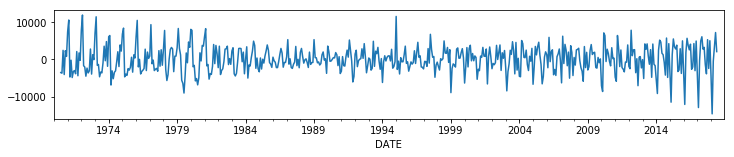

## Train Test Split

**TASK: Figure out the length of the data set**

In [ ]:
# CODE HERE


588

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [ ]:
# CODE HERE


In [ ]:
len(test)


12

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [ ]:
# CODE HERE


MinMaxScaler(copy=True, feature_range=(0, 1))

# Time Series Generator

We Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12. n_input refers to the window size, ie. length of your sequence.
We want to do a one step ahead forecast.

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator


In [ ]:
n_input = 12 # you might need to test a variety of input values and test performance,
#but at least 12 to capture one cycle of seasonality

n_features=1 # for univariate time series always 1

# Create input data from time series with generator object
# we put in the train data 2, once as actual train data, once as target variable, specify window length =n_input
# smaller batch sizes tend to work better
# CAREFUL: adjust the following 'scaled_train' to the name of your train object
generator = TimeseriesGenerator(scaled_train, scaled_train, sampling_rate=1, length=n_input, batch_size=1)



Using TensorFlow backend.


TASK: inspect the output of the TimeSeriesGenerator

In [ ]:
# As result, we get a set of tuples (x, y) which we can enumerate and index
print('Length of the output is {}.'.format(len(generator)))

demo_x0 = generator[0][0]
demo_y0 = generator[0][1]




### Create the Model

Create a Keras Sequential Model with as many LSTM units as you want and a final Dense Layer.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [ ]:
# fit model
model.fit_generator(generator,epochs=30)


Epoch 1/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 2/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0011
Epoch 3/10
552/552 [==============================] - 16s 30ms/step - loss: 9.5115e-04
Epoch 4/10
552/552 [==============================] - 17s 30ms/step - loss: 8.8495e-04
Epoch 5/10
552/552 [==============================] - 17s 30ms/step - loss: 8.4229e-04
Epoch 6/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0012
Epoch 7/10
552/552 [==============================] - 17s 30ms/step - loss: 8.6496e-04
Epoch 8/10
552/552 [==============================] - 17s 30ms/step - loss: 7.5506e-04
Epoch 9/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 10/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0010


**TASK: Plot the history of the loss that occured during training.**

In [ ]:
# CODE HERE


dict_keys(['loss'])

# Evaluate on Test Data

Based on your test data and input size, create an appropriately sized "first evaluation batch"

In [ ]:
first_eval_batch = scaled_train[-n_input:]


In [ ]:
first_eval_batch


array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

In [ ]:
# reshape the data to get it into the 3 dimensional shape needed for the keras model and model.predict()
# same dim as TimeSeriesGenerator output
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))


**TASK: predict the first point of the test dataset**

In [ ]:
# Code here


In [ ]:
#


## Now let's put this logic in a for loop to predict into the future for the entire test range.


**TASK: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [ ]:
# FORECAST USING RNN MODEL

 # list for holding predictions
test_predictions = []


# how far into feature will you foreacst (here just len test)
for i in range(len(test)):

    # get prediction 1 time stamp ahead of historical 12 points ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store that  prediction
    test_predictions.append(current_pred)

    # update current batch to now include prediction and drop first value
    # append current prediction and this is all teh code we need to forecast into the future, ie. into the testset
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions to retrieve back the original and not the scaled values**

In [ ]:
# invert scale to get back true predicted values!
#CODE HERE


array([[246787.65124869],
       [235267.94174141],
       [258981.00705367],
       [269320.52187717],
       [280305.23281485],
       [283555.27218211],
       [288203.31152987],
       [283559.36330348],
       [271973.99567699],
       [276999.53167695],
       [261872.87937891],
       [264047.44175631]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [ ]:
# CODE HERE


,Value,Predictions
DATE,,
2018-01-01,245695.0,246787.651249
2018-02-01,226660.0,235267.941741
2018-03-01,268480.0,258981.007054
2018-04-01,272475.0,269320.521877
2018-05-01,286164.0,280305.232815
2018-06-01,280877.0,283555.272182
2018-07-01,288145.0,288203.311530
2018-08-01,286608.0,283559.363303
2018-09-01,260595.0,271973.995677


**TASK: Plot out the test set against your own predicted values.**

In [ ]:
# CODE HERE


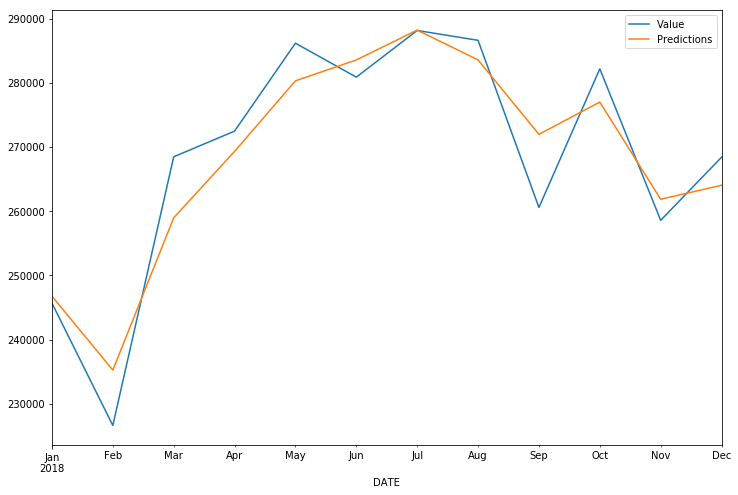

# Saving Models

**TASK: Optional, Save your model!**